# punto 1

En relación con la naturaleza de los datos, qué condiciones deben cumplir las matrices desde la perspectiva de los mínimos cuadrados.



Dado $A \in \mathbb{R}^{m\times n}$ y $b\in \mathbb{R}^m$ with $m\geq n$, el problema es encontrar $x\in\mathbb{R}^n$ que minimice \n",
    "$$\lvert \lvert Ax-b \lvert \lvert _2$$ conocido como el problema de minimos cuadrados.",
    "

En estadística clásica los modelos de regresión simples o múltiples se utilizan para encontrar la relación lineal entre la variable dependiente y las variables explicatorias donde todas las variables deben ser continuas, sin embargo, dicha metodolgía solo funciona bajo algunas condiciones.
* Las variables dependientes y independientes deben ser continuas.
* El número de observaciones debe ser mayor al número de variables en el modelo.
* Multicolinealidad, es decir, las variables no deben ser correlacionadas entre ellas. Esto se verifica usando el críterio de Variance Inflator Factor (VIF) 
* Las observaciones debe ser obtenidad de manera independiente
* La distribución de los error se asume normalmente como normales univariadas con media cero y varianza $\sigma^2$

Si aseguramos en nuestros datos las anteriores consideraciones, podemos concluir que el problema de optimización convexa anterior tenga solucion, lo anterios es conocido como las ecuaciones normales del proceso, la cual tiene solución $x = (A^{T}A  )^{-1} A^{T}Y $, donde la existencia de la inversa se asegura dado que las columnas de la matriz $A$ son independientes 

## Punto 2

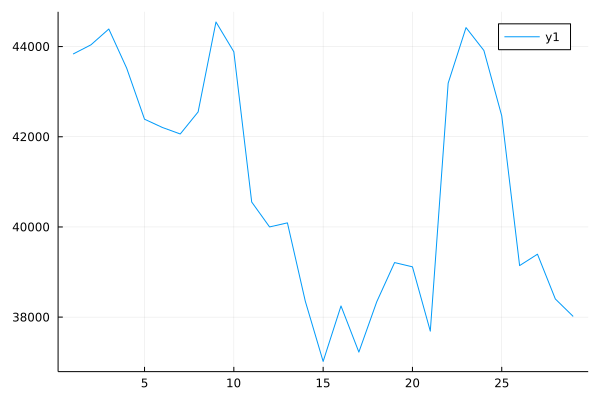

In [54]:
using CSV, Dates, Plots
using LinearAlgebra
using DataFrames
dataBitcoin = CSV.read("/Users/sebastianoviedo/Downloads/Bitcoin.csv",DataFrame);
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);
dataBitcoin.Date=Date.(dataBitcoin.Date,Dates.DateFormat("u d, y"))

dataBitcoin = dataBitcoin[!, Not([:Price,:Open,:High,:Low,:Vol,:Change])]
sort!(dataBitcoin, (:Date),rev = false)
plot(dataBitcoin.PriceFloat)

In [6]:
b

29-element Vector{Float64}:
 43833.9
 44038.2
 44388.9
 43521.0
 42388.4
 42205.2
 42061.1
 42550.3
 44544.4
 43883.6
 40552.8
 40000.1
 40090.3
     ⋮
 38339.2
 39209.6
 39115.5
 37689.1
 43188.2
 44420.3
 43912.8
 42463.0
 39142.7
 39395.8
 38403.1
 38014.8

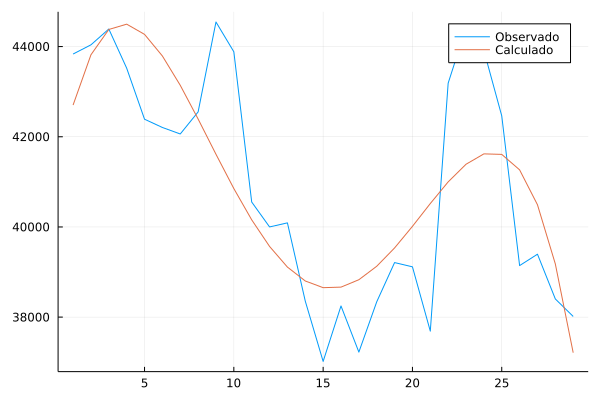

In [7]:
N = size(dataBitcoin.PriceFloat,1)
A = Array((1:N))
b = Array(dataBitcoin.PriceFloat)
A = [ones(N,1) A A.^2 A.^3 A.^4]
p = A\b
pred =p[5]*A[:,5] + p[4]*A[:,4]+p[3]*A[:,3]+p[2]*A[:,2] + p[1]*ones(N,1)
plot(A[:,2],b, label = "Observado")
plot!(A[:,2],pred,label = "Ajustado")

Como se puede observar, cuando nos aproximamos por medio de polinomios a la curva observada el ajuste es más cercano a los datos observados.

## Punto 3. Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silver and gold, during the last year.

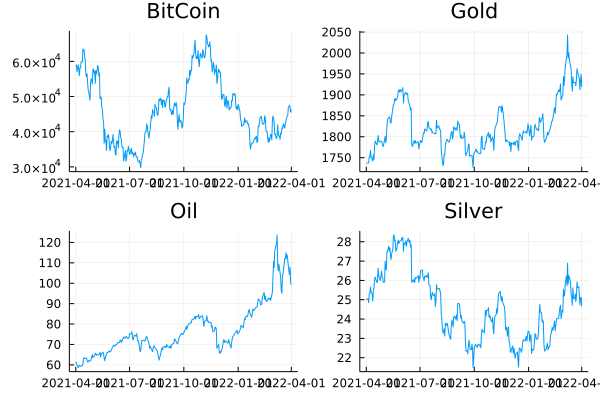

In [30]:
using CSV, Dates
using DataFrames
############################### Función para agregar columna de datos como Float64, establecer tipo fecha y eliminar información de dataframe
function addColumnFloat(data,field,newColumn)
    data[!,field] .= replace.(data[!,field], "." => "");
    data[!,field] .= replace.(data[!,field], "," => ".");
    data[!,newColumn] = parse.(Float64, data[!,field]);
    data[!,"Fecha"] = replace.(data[!,"Fecha"], "." => "-");
    data[!,"Fecha"]=Date.(data[!,"Fecha"],Dates.DateFormat("d-m-y"))
    data=select(data, Not([:Último,:Apertura,:Máximo,:Mínimo,:Vol,:var]))
    return data
end
##########################

arrayDF = ["BTC","GOLD","OIL","SILVER"]


dataBitcoin = CSV.read("/Users/sebastianoviedo/Downloads/"*arrayDF[1]*".csv",DataFrame)
    dataBitcoin.Último .= replace.(dataBitcoin.Último, "." => "");
    dataBitcoin.Último .= replace.(dataBitcoin.Último, "," => ".");
    dataBitcoin.BitCoin = parse.(Float64, dataBitcoin.Último);
    dataBitcoin.Fecha = replace.(dataBitcoin.Fecha, "." => "-");
    dataBitcoin.Fecha=Date.(dataBitcoin.Fecha,Dates.DateFormat("d-m-y"))
    dataBitcoin=select(dataBitcoin, Not([:Último,:Apertura,:Máximo,:Mínimo,:Vol,:var]))

dataGold = CSV.read("/Users/sebastianoviedo/Downloads/"*arrayDF[2]*".csv",DataFrame)
    dataGold.Último .= replace.(dataGold.Último, "." => "");
    dataGold.Último .= replace.(dataGold.Último, "," => ".");
    dataGold.Gold = parse.(Float64, dataGold.Último);
    dataGold.Fecha = replace.(dataGold.Fecha, "." => "-");
    dataGold.Fecha=Date.(dataGold.Fecha,Dates.DateFormat("d-m-y"))
    dataGold=select(dataGold, Not([:Último,:Apertura,:Máximo,:Mínimo,:Vol,:var]))

dataOil = CSV.read("/Users/sebastianoviedo/Downloads/"*arrayDF[3]*".csv",DataFrame)
    dataOil.Último .= replace.(dataOil.Último, "." => "");
    dataOil.Último .= replace.(dataOil.Último, "," => ".");
    dataOil.Oil = parse.(Float64, dataOil.Último);
    dataOil.Fecha = replace.(dataOil.Fecha, "." => "-");
    dataOil.Fecha=Date.(dataOil.Fecha,Dates.DateFormat("d-m-y"))
    dataOil=select(dataOil, Not([:Último,:Apertura,:Máximo,:Mínimo,:Vol,:var]))

dataSilver = CSV.read("/Users/sebastianoviedo/Downloads/"*arrayDF[4]*".csv",DataFrame)
    dataSilver.Último .= replace.(dataSilver.Último, "." => "");
    dataSilver.Último .= replace.(dataSilver.Último, "," => ".");
    dataSilver.Silver = parse.(Float64, dataSilver.Último);
    dataSilver.Fecha = replace.(dataSilver.Fecha, "." => "-");
    dataSilver.Fecha=Date.(dataSilver.Fecha,Dates.DateFormat("d-m-y"))
    dataSilver=select(dataSilver, Not([:Último,:Apertura,:Máximo,:Mínimo,:Vol,:var]))

## See some plots
using Plots
p1 = plot(dataBitcoin.Fecha,dataBitcoin.BitCoin,title = "BitCoin");
p2 = plot(dataGold.Fecha,dataGold.Gold,title = "Gold");
p3 = plot(dataOil.Fecha,dataOil.Oil,title = "Oil");
p4 = plot(dataSilver.Fecha,dataSilver.Silver,title = "Silver");
plot(p1, p2, p3, p4, layout = (2,2), legend = false , color="darkblue")

En la gráfica anterior podemos observar que aparentemente no existe alguna correlación de los precios de Bitcoin con respecto a los 3 comodities de oro, plata y petroleo

In [33]:
# Join data setb by date and delete used data sets
A = join(dataBitcoin,dataGold, on = :Fecha)
B = join(A,dataOil, on = :Fecha)
FinalData = join(B,dataSilver, on = :Fecha)
A = nothing
B = nothing
dataBitcoin =nothing
dataGold = nothing
dataOil = nothing
dataSilver = nothing
FinalData

,Fecha,BitCoin,Gold,Oil,Silver
,Date,Float64,Float64,Float64,Float64
1,"Date(""2022-04-01"")",46297.0,1919.1,99.27,24.654
2,"Date(""2022-03-31"")",45525.0,1949.2,100.28,25.133
3,"Date(""2022-03-30"")",47075.0,1933.5,107.82,25.113
4,"Date(""2022-03-29"")",47449.0,1912.2,104.24,24.736
5,"Date(""2022-03-28"")",47105.0,1939.8,105.96,25.196
6,"Date(""2022-03-25"")",44331.0,1954.2,113.9,25.615
7,"Date(""2022-03-24"")",44013.0,1962.2,112.34,25.92
8,"Date(""2022-03-23"")",42912.0,1937.3,114.93,25.189
9,"Date(""2022-03-22"")",42373.0,1921.5,111.76,24.904


Como debemos tratar de modelar la relacion del precio del BTC con los demás comodities, podemos considerar un modelo no lienal de la sigueinte forma $BTC = \beta_{0} +\beta_{5}* Plata + \beta_{1}* Plata^2 + \beta_{2} * Oro^2 + \beta_{3} * Aceite^3$

In [41]:
N = size(FinalData.BitCoin,1)
A = Array((1:N))
b = Array(FinalData.BitCoin)
A = [ones(N,1) FinalData.Gold.^2 FinalData.Oil.^3 FinalData.Silver FinalData.Silver.^2]
p = A\b


#A = [ones(N,1) A A.^2 A.^3 A.^4]

5-element Vector{Float64}:
 -225396.03173104563
      -0.011368727039521397
      -0.000971560425910929
   25508.940066538682
    -521.841237505619

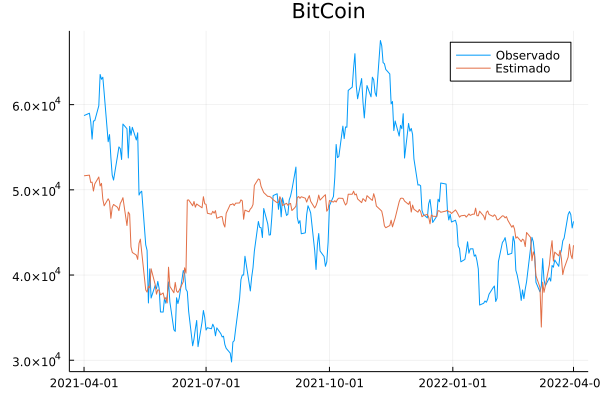

In [43]:
BitCoin = LinRange(minimum(FinalData.BitCoin),maximum(FinalData.BitCoin),100)
Gold = LinRange(minimum(FinalData.Gold),maximum(FinalData.Gold),100)
Oil = LinRange(minimum(FinalData.Oil),maximum(FinalData.Oil),100)
Silver = LinRange(minimum(FinalData.Silver),maximum(FinalData.Silver),100)

FinalData.Regr = p[1].+p[2].*FinalData.Gold.^2 + p[3].*FinalData.Oil.^3 + p[4].*FinalData.Silver + p[5].*FinalData.Silver.^2

p1 = plot(FinalData.Fecha,FinalData.BitCoin,title = "BitCoin", label = "Observado")
p2 = plot!(FinalData.Fecha,FinalData.Regr, Label = "Calculado", label = "Estimado")
#plot(p1,p2,layout = (1,2))

## Punto 3. Solve the point set registration problem. Hint (check: S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991). Construct a GUI to test.

Dados dos patrones de puntos correspondientes y , queremos encontrar una transformación de similitud $S$, dada por Matriz de rotación  $R$, factor de escala $a$ y vector traslacional $T$, que alinee los puntos en correspondencia, de la mejor manera posible. En otras palabras, $\hat{X}=S_{R,a,T}(X)\approx Y$

In [46]:
### Funcion para calcular los parámetros óptmimos de la trasformación ###

function TP(X,Y,compute_error)
    
    # Useful constant
    n = size(X,1)
    
    # Compute mean vectors
    μ_x = 1/n * [ sum(X[:,1]) ; sum(X[:,2])]; 
    μ_y = 1/n * [ sum(Y[:,1]) ; sum(Y[:,2])];
    
    # Compute variance around mean vectors
    σ_x = 1/n *sum([(X[i,:]-μ_x)'*(X[i,:]-μ_x) for i in 1:n]);
    σ_y = 1/n * sum([(Y[i,:]-μ_y)'*(Y[i,:]-μ_y) for i in 1:n]);
    
    # Calculate covariance matrix between X and Y 
    Σ = 1/n * sum([ (Y[i,:]-μ_y)*(X[i,:]-μ_x)' for i in 1:n]);
   
    #Singular values decomposition
    U , D , V = svd(Σ);
    
    # NOTE 1: When we use svd function of LinearAlgebra Package, it returns D as a column vector. 
    #         So it is necessary to turn D in a diagonal matrix.
    D = diagm(D)
    # Now we save the number of singular values. It depends on the dimension m of the space where we are working
    m = size(D,1);
    
    # Computing S according to the restrictions
    if rank(Σ) >= m - 1
        if det(Σ)>=0
            S = 1*I(m); 
        elseif det(Σ)<0
            S = 1*I(m);
            S[m,m] = -1;
        end

    elseif rank(Σ) == m - 1
        if det(U)*det(V) == 1 
            S = 1*I(m);
        elseif det(U)*det(V) == -1 
            S = 1*I(m);
            S[m,m] = -1;
        end
    end

    
    # Compute transform parameters
    R = U*S*V
    c = 1/σ_x * tr(D*S)
    t = μ_y - c*R*μ_x
    
    # Calculate error given by Umeya's Formula if the user wants to
    if compute_error == true
        ϵ = σ_y - tr(D*S)^2 / σ_x
        return R,c,t,ϵ
    else 
        
    return R,c,t
        
    end
    
end

TP (generic function with 1 method)

In [72]:
function Animate(X,Y,R,c,t)
    
    # Useful constants
    n = size(X,1)
    m = size(t,1)
    
    # Building T
    T = ones(n,m)*diagm(t)
    
    # Getting the angle associated to the rotation matrix R.
    β = atan(R[2,1],R[1,1])
    
    # Gif animation 
    @gif for i in range(0,1,200)

            # Build the variable rotation matrix
            M = Array([cos(i*β) -sin(i*β) ; sin(i*β) cos(i*β) ])
            # Define Z
            Z = (1+(c-1)*i) * X * M' + i*T
            
            # Ploting Variable points Z
            scatter(Z[:,1],Z[:,2], color="green", label="T(X)")
            # Ploting static points Y
            scatter!(Y[:,1],Y[:,2], color="brown", label="Y")
            
            # Set static plane based on the dimensions of the figure determined by Y and adding a 80% margin
            xlims!((1.8*minimum(Y[:,1]),1.8*maximum(Y[:,1])))
            ylims!((1.8*minimum(Y[:,2]),1.8*maximum(Y[:,2])))
            
         end
end

Animate (generic function with 1 method)

In [48]:
# Rotate a point set i.e a figure
function Rotate(X,θ)
    Rot = Array([cos(θ) -sin(θ) ; sin(θ) cos(θ)])
    X = X*Rot'
    return X
end

Rotate (generic function with 1 method)

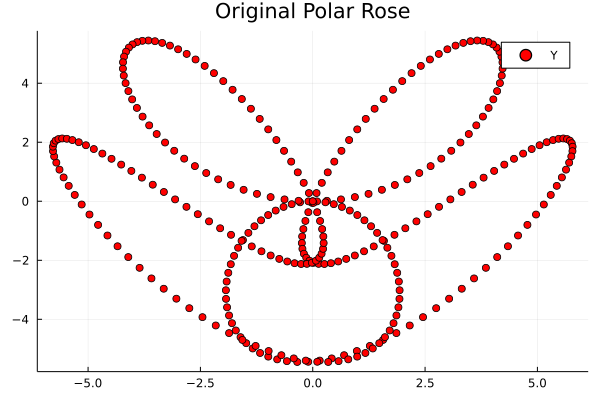

In [50]:
# Parametrization of the Polar Rose with 500 points
n = 300
t = LinRange(0 , 2π , n )
PR_y_1 = 3*sin.(t) + 3*sin.(4*t);
PR_y_2 = 3cos.(t) - 3*cos.(5t);
PR_Y = [PR_y_1 PR_y_2];
scatter(PR_Y[:,1],PR_Y[:,2], title=" Polar Rose", color="red", label="Y")

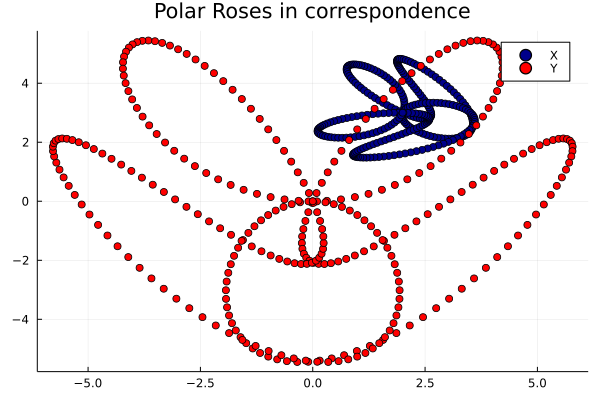

In [74]:
# Deforming the Polar Rose 

# Reescale
PR_X = 0.3*PR_Y
# Rotate 
PR_X = Rotate(PR_X,π\4)
# Translate 2 units in the x-axes and 3 in the y-axes
a,b = 2,3
PR_X[:,1] = PR_X[:,1]+a*ones(n)
PR_X[:,2] = PR_X[:,2]+b*ones(n)


scatter(PR_X[:,1],PR_X[:,2], title="Polar Roses in correspondence", color="darkblue", label="X")
scatter!(PR_Y[:,1],PR_Y[:,2], color="red", label="Y")

In [75]:
### Apply the algorithm to get the optimum transformation parameters and the error. ###

R,c,t,ϵ = TP(PR_X,PR_Y,true);
print("The mean square error is: ", ϵ)

The mean square error is: 3.552713678800501e-15

┌ Info: Saved animation to 
│   fn = /Users/sebastianoviedo/tmp.gif
└ @ Plots /Users/sebastianoviedo/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/sebastianoviedo/tmp.gif")
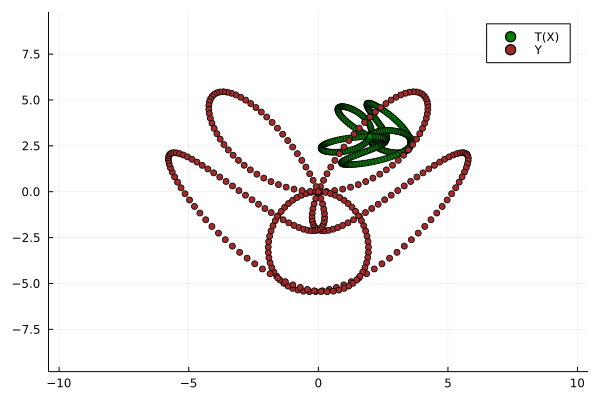

In [76]:
Animate(PR_X,PR_Y,R,c,t)